# Example
---

In this notebook we will present an application of the code developed. For the example we use the information from Preferencial Bancolombia (a preffered stock for a commercial bank) with the following ticker: PFBCOLO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [2]:
#Unzip data
## unzip the data
zip = ZipFile('taqcolombiasample.zip')
zip.extractall()

## Import data

In [3]:
data = pd.read_csv('intradayColombia.csv',parse_dates=['timestamp'], sep=',', 
                   na_values='NA', 
                   low_memory=False)

In [4]:
data.head()

,ticker,volume,timestamp,type,price
0,PFBCOLO CB Equity,0,2017-03-03 09:15:00,BID,0
1,PFBCOLO CB Equity,0,2017-03-03 09:15:00,ASK,0
2,PFBCOLO CB Equity,2000,2017-03-03 09:15:00,ASK,31800
3,PFBCOLO CB Equity,2000,2017-03-03 09:15:00,ASK,29500
4,PFBCOLO CB Equity,1913,2017-03-03 09:15:00,ASK,28500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030561 entries, 0 to 1030560
Data columns (total 5 columns):
ticker       1030561 non-null object
volume       1030561 non-null int64
timestamp    1030561 non-null datetime64[ns]
type         1030561 non-null object
price        1030561 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.3+ MB


## Preprocessing
---
Now we begin to preprocess our data with the `StockPreprocessing(stockdata, stock_ticker)` method.

In [6]:
from PreprocessPipeline import *

### Choose a particular stock from the list (PFBCOLO, ECOPETL, BCOLO, PFAVH, ISA)

In [7]:
tickers = ['ECOPETL', 'BCOLO', 'PFAVH', 'ISA']

In [8]:
# The intial preprocessing is applied
prep_data = StockPreprocessing(data, tickers)

In [9]:
# Lets check out the output
prep_data.head()

,dia,nombre,tipo,precio,volumen,ASK,BID,Mid_price,Quoted_Spread
date_time,,,,,,,,,
2017-01-06 09:30:00,2017-01-06,BCOLO CB Equity,ASK,30480,12000,30480.0,NaN,NaN,NaN
2017-01-06 09:30:00,2017-01-06,ISA CB Equity,BID,13500,10221,14080.0,13500.0,13790.0,0.042059
2017-01-06 09:30:00,2017-01-06,PFAVH CB Equity,ASK,2495,26365,2495.0,NaN,NaN,NaN
2017-01-06 09:30:00,2017-01-06,PFAVH CB Equity,ASK,2495,34365,2495.0,NaN,NaN,NaN
2017-01-06 09:30:00,2017-01-06,PFAVH CB Equity,ASK,2490,8200,2490.0,NaN,NaN,NaN


Depths are calculated with the `StockDepth(stockdata, stock_ticker)` method

In [10]:
# The depths are calculated
depth_data = StockDepth(prep_data, tickers)

'''
NOTE:
-----
If you wish to replicate the analysis presented in the `DailyParams.ipynb`
and `IntradayParams.ipynb` notebooks, please save the `depth_data` dataframe
as a csv file with the df.to_csv command. Then, create a virtual environment 
and load the outputed csv data into the corresponding notebook.
'''
#depth_data.to_csv

'\nNOTE:\n-----\nIf you wish to replicate the analysis presented in the `DailyParams.ipynb`\nand `IntradayParams.ipynb` notebooks, please save the `depth_data` dataframe\nas a csv file with the df.to_csv command. Then, create a virtual environment \nand load the outputed csv data into the corresponding notebook.\n'

In [11]:
depth_data.head()

,dia,nombre,tipo,precio,ASK,BID,Mid_price,Quoted_Spread,volumen,ASK_depth,BID_depth,Depth,log_depth
date_time,,,,,,,,,,,,,
2017-01-06 09:30:00,2017-01-06,ECOPETL CB Equity,BID,1330,NaN,NaN,NaN,NaN,171206,0,171206,171206,12.050623
2017-01-06 09:30:00,2017-01-06,BCOLO CB Equity,BID,29480,30300.0,29480.0,29890.0,0.027434,3000,52726,3000,55726,10.928202
2017-01-06 09:30:00,2017-01-06,BCOLO CB Equity,ASK,30300,30300.0,NaN,NaN,NaN,5700,52726,0,52726,10.872864
2017-01-06 09:30:00,2017-01-06,BCOLO CB Equity,ASK,30280,30280.0,29480.0,29880.0,0.026774,9442,47026,0,47026,10.758456
2017-01-06 09:30:00,2017-01-06,BCOLO CB Equity,ASK,30280,30280.0,29480.0,29880.0,0.026774,9442,37584,0,37584,10.534334


## Price impact
---

We assume that the trade activity of a stock has a linear price impact which depends on the net price change and the order of the transaction, which we call `order_flow`.

To calculate order flow, we need to identify the transactions initiating party with the `InitiatingParty(stockdata)` method.

In [12]:
# To calculate order flow, we need to identify the transactions initiating party
init_party = InitiatingParty(depth_data)

In [13]:
# Checking the output
init_party[['nombre', 'tipo', 'precio', 'iniciado']].head()

,nombre,tipo,precio,iniciado
date_time,,,,
2017-01-06 09:30:00,ISA CB Equity,TRADE,14080,1.0
2017-01-06 09:30:00,ISA CB Equity,TRADE,14000,1.0
2017-01-06 09:30:00,ISA CB Equity,TRADE,14000,1.0
2017-01-06 09:30:00,ISA CB Equity,TRADE,14080,1.0
2017-01-06 09:30:00,ECOPETL CB Equity,TRADE,1335,-1.0


Now we can obtain net price change and order flow with `ImpactParameters(stockdata, stock_ticker)`

In [15]:
# Impact parameters for the linear regression
impact_params = ImpactParameters(init_party, tickers)

In [16]:
impact_params[['nombre', 'tipo', 'precio', 'iniciado', 'delta_p', 'order_flow']].head()

,nombre,tipo,precio,iniciado,delta_p,order_flow
date_time,,,,,,
2017-01-06 09:30:00,ECOPETL CB Equity,TRADE,1335,-1.0,NaN,-7490.0
2017-01-06 09:30:00,ISA CB Equity,TRADE,14000,1.0,-80.0,1393.0
2017-01-06 09:30:00,ISA CB Equity,TRADE,14080,1.0,NaN,14493.0
2017-01-06 09:30:00,ISA CB Equity,TRADE,14000,1.0,0.0,1200.0
2017-01-06 09:30:00,ISA CB Equity,TRADE,14080,1.0,80.0,27407.0


Finally, we perform the linear regression with `KyleImpactRegression(stockdata, stock_ticker)`

In [17]:
# Linear regression
kyle_reg = KyleImpactRegression(impact_params, tickers)

In [22]:
for k in kyle_reg.keys():
    print(k)
    print("----------")
    print(kyle_reg[k].head())

ECOPETL
----------
            coef_regresion   p_value  trades
dia                                         
2017-01-06    3.215074e-06  0.098733     439
2017-01-08    1.128546e-06  0.184643     384
2017-02-05    4.485302e-06  0.000072     842
2017-02-06    8.425427e-07  0.532391     453
2017-02-08    1.273435e-05  0.000902     239
BCOLO
----------
            coef_regresion   p_value  trades
dia                                         
2017-01-06        0.000164  0.219032     196
2017-01-08        0.000110  0.634782      81
2017-02-05        0.000371  0.262908      61
2017-02-06        0.000149  0.303373     244
2017-02-08        0.000123  0.886690     104
PFAVH
----------
            coef_regresion   p_value  trades
dia                                         
2017-01-06        0.000360  0.008766      64
2017-01-08       -0.000008  0.973693      41
2017-02-05        0.000428  0.168718      87
2017-02-06        0.000389  0.083926      59
2017-02-08        0.000140  0.433384      68
IS

In [23]:
for k in kyle_reg.keys():
    print(k)
    print("----------")
    print(kyle_reg[k].info())

ECOPETL
----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2017-01-06 to 2017-12-07
Data columns (total 3 columns):
coef_regresion    119 non-null float64
p_value           119 non-null float64
trades            119 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.7 KB
None
BCOLO
----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2017-01-06 to 2017-12-07
Data columns (total 3 columns):
coef_regresion    119 non-null float64
p_value           119 non-null float64
trades            119 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.7 KB
None
PFAVH
----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2017-01-06 to 2017-12-07
Data columns (total 3 columns):
coef_regresion    119 non-null float64
p_value           119 non-null float64
trades            119 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.7 KB
None
ISA
----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 

# Market quality parameters: visualization
---

Once we have performed all preliminary calculations, we can visualize the intra-day market quality parameters. In order to do this, we will use the `graph(stockdata, stock_ticker, param)` method we developed.

In [24]:
from Visualization import *

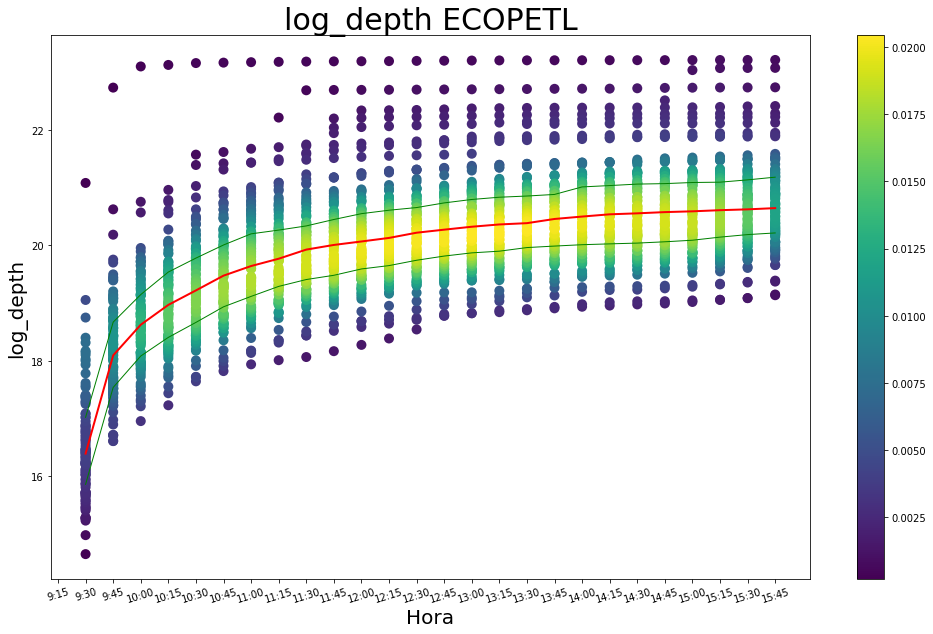

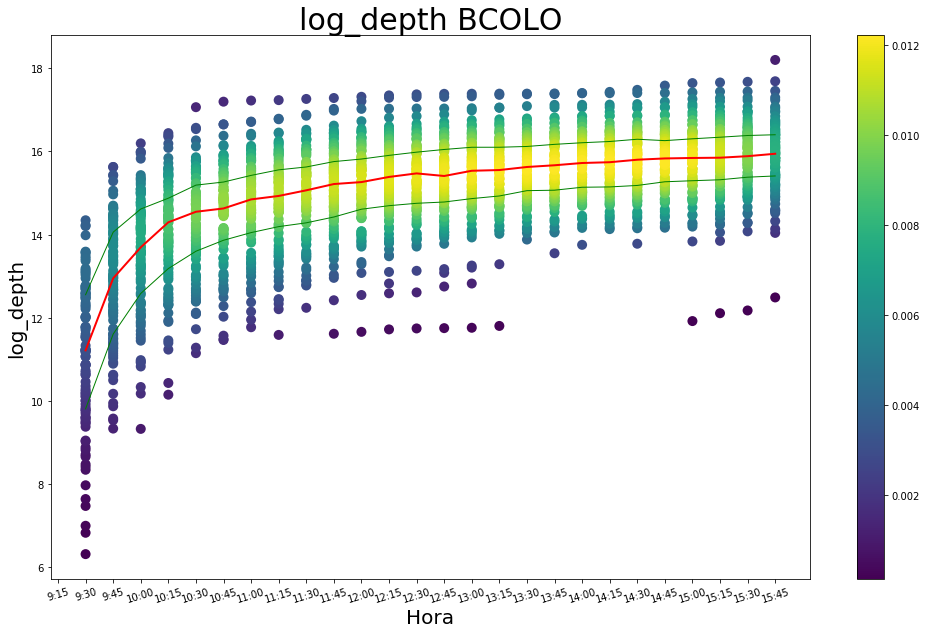

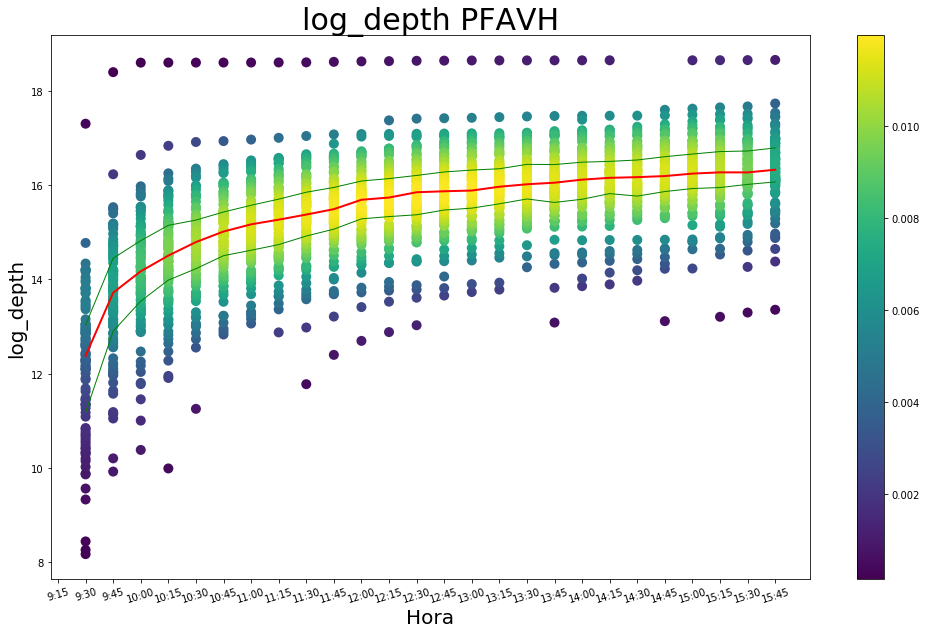

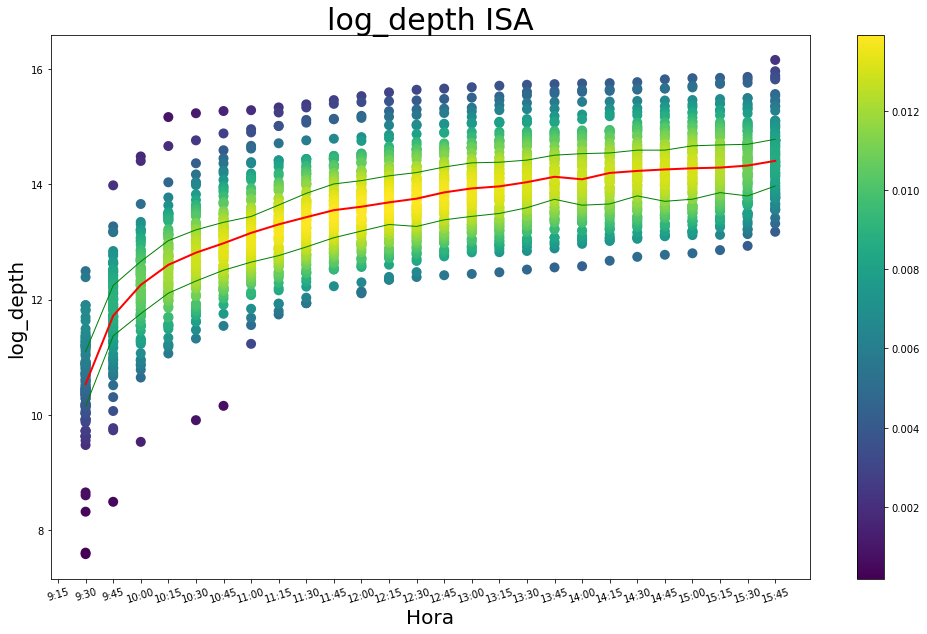

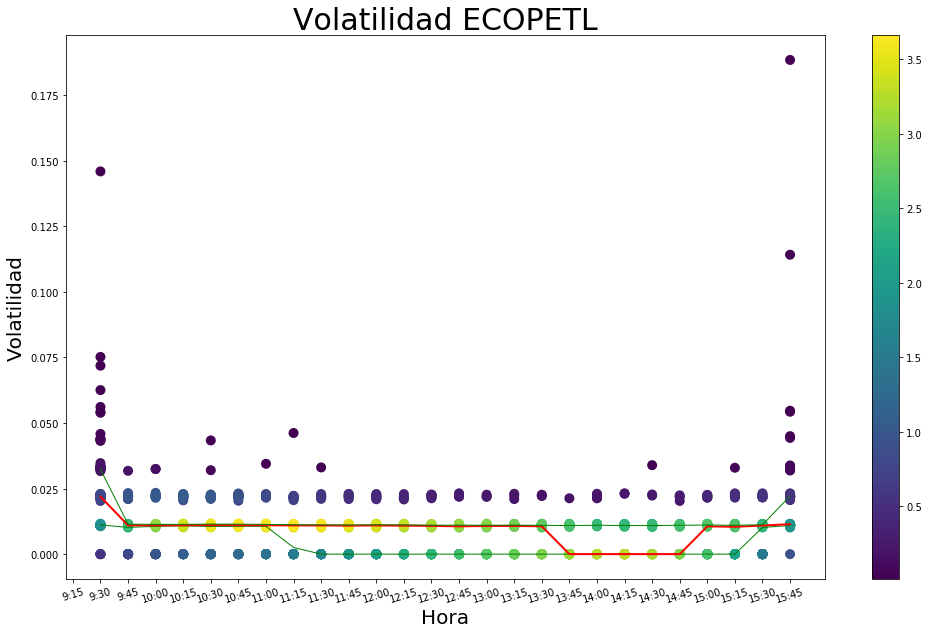

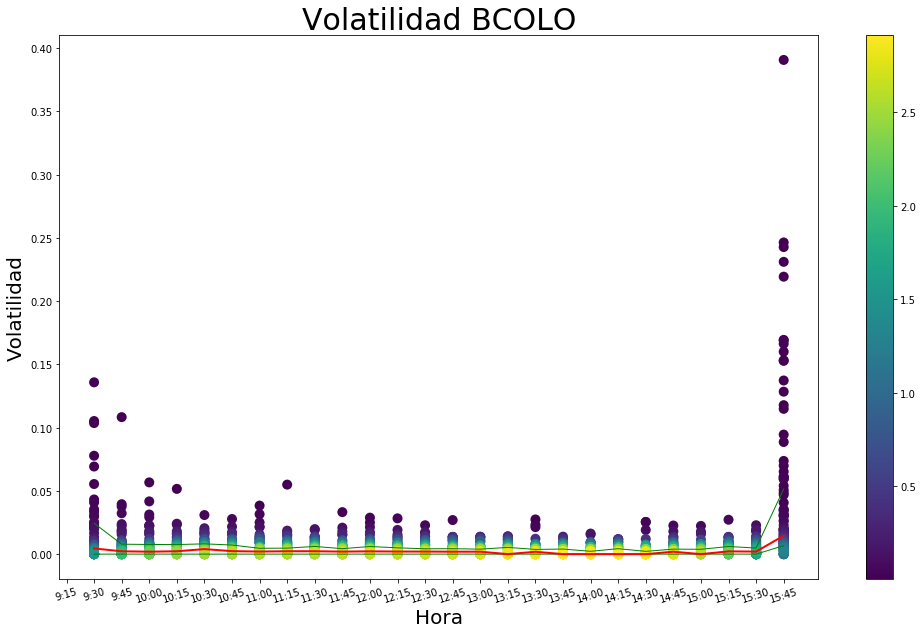

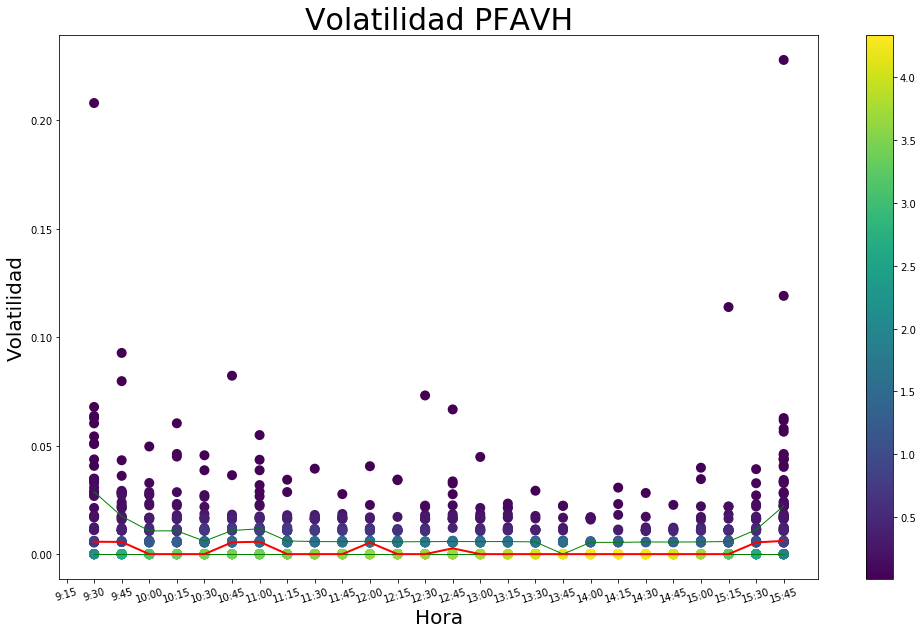

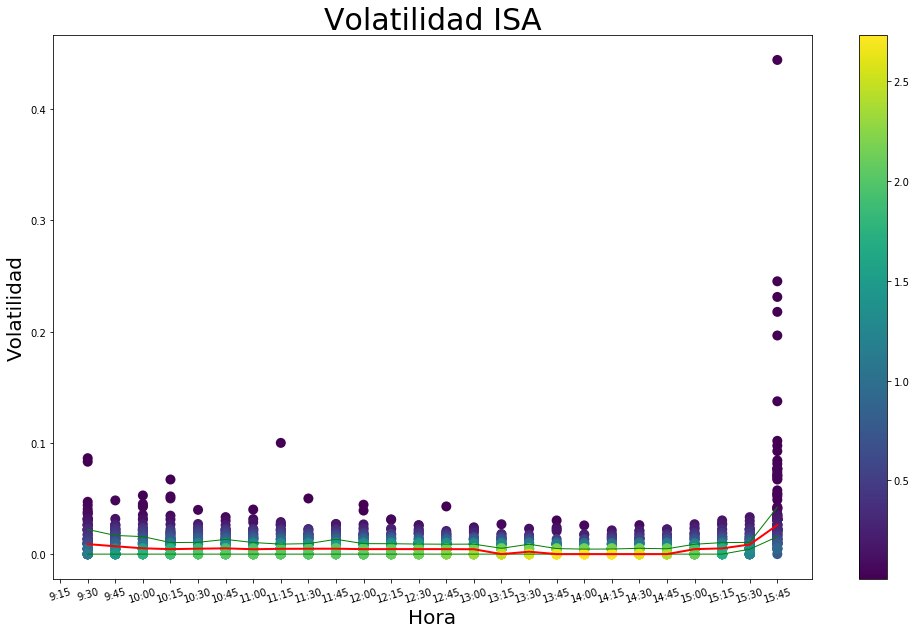

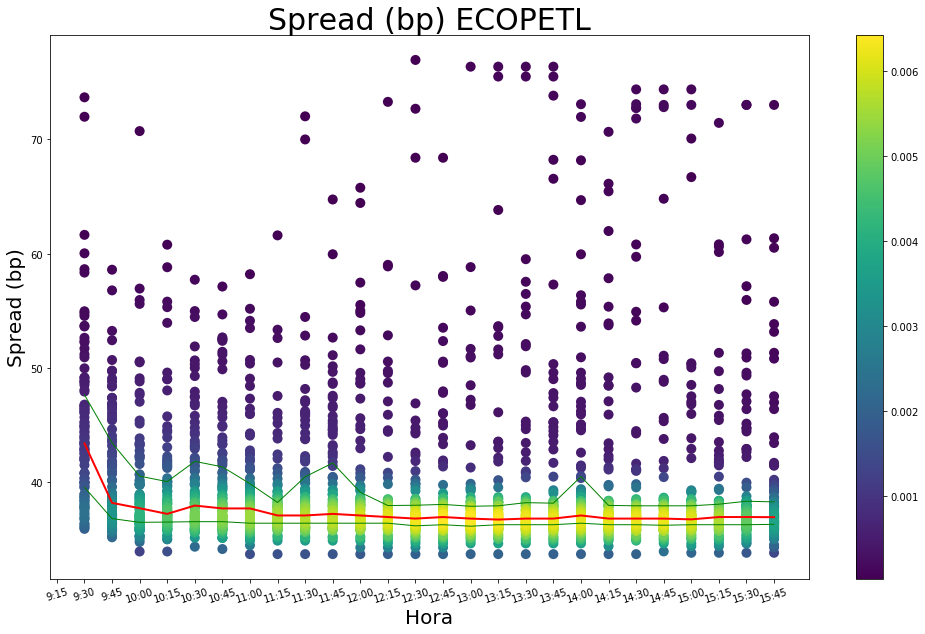

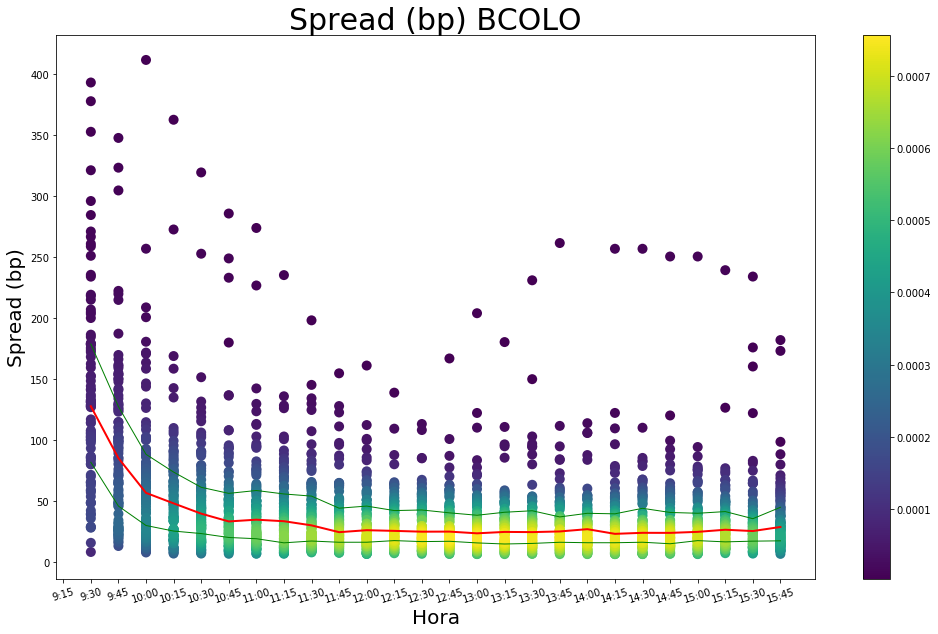

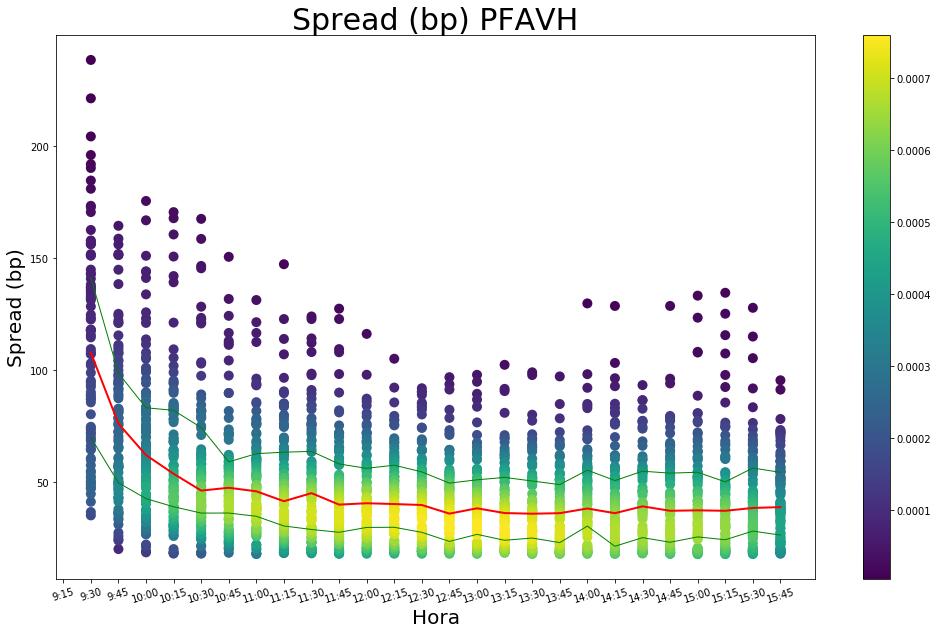

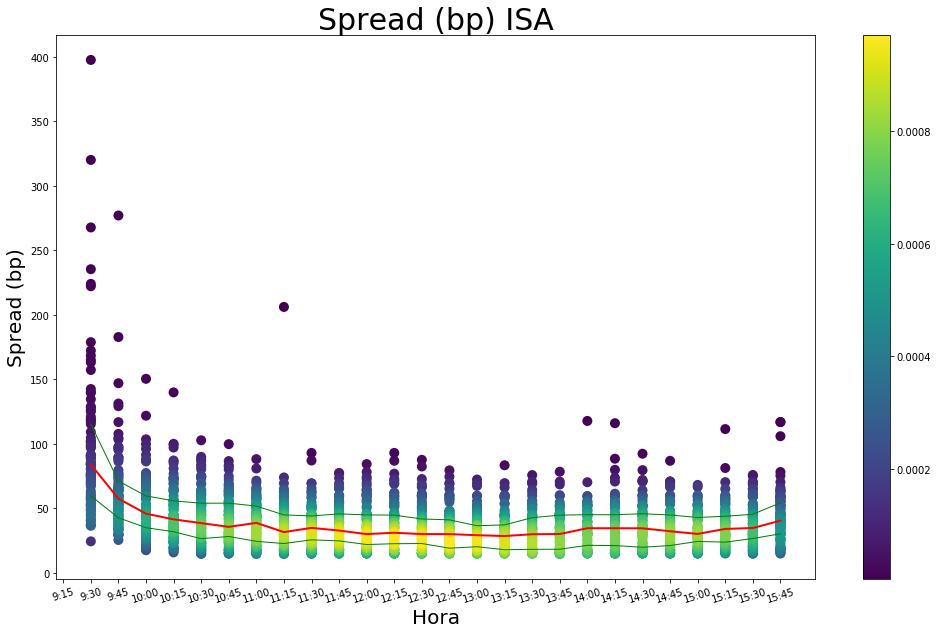

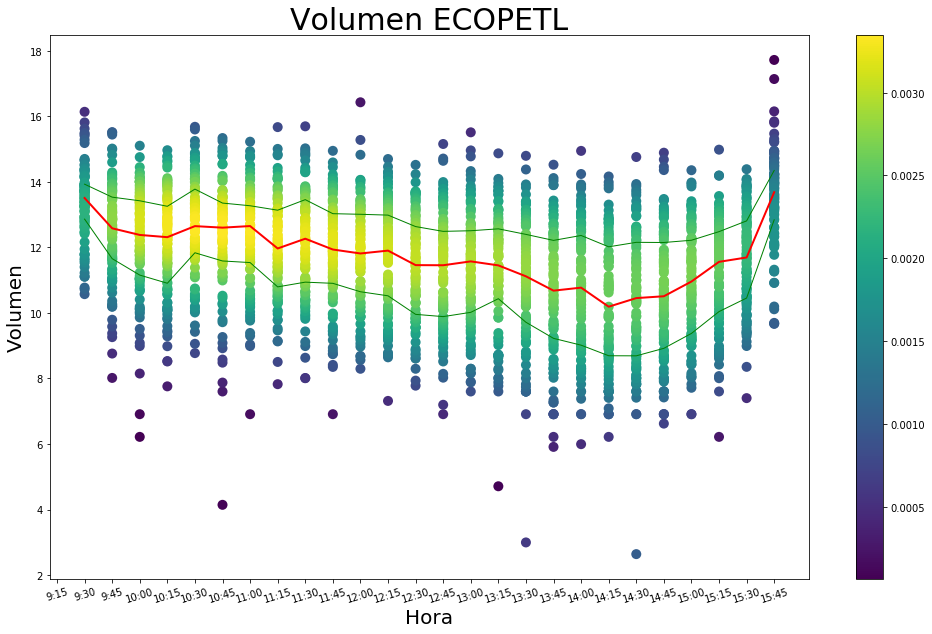

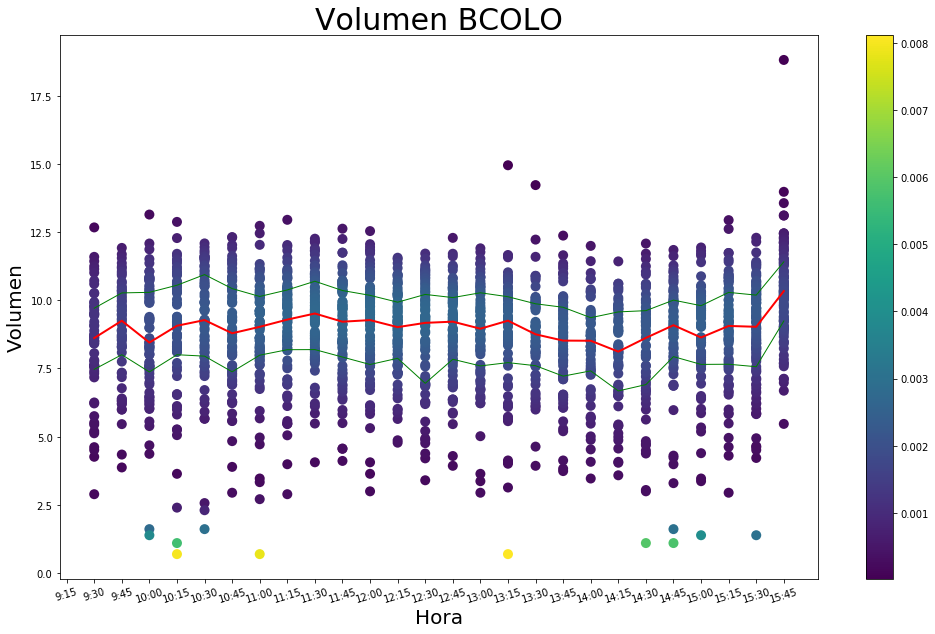

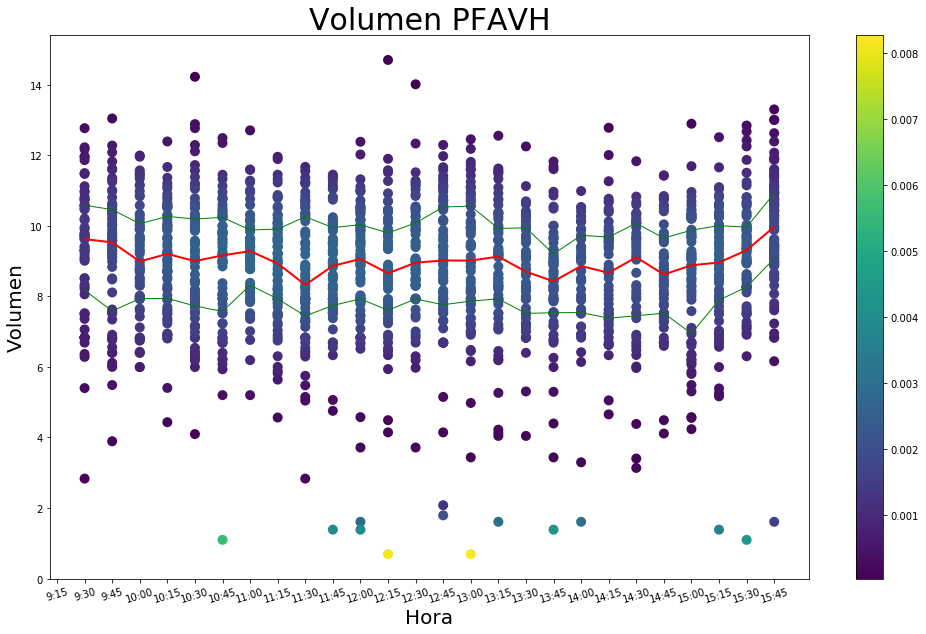

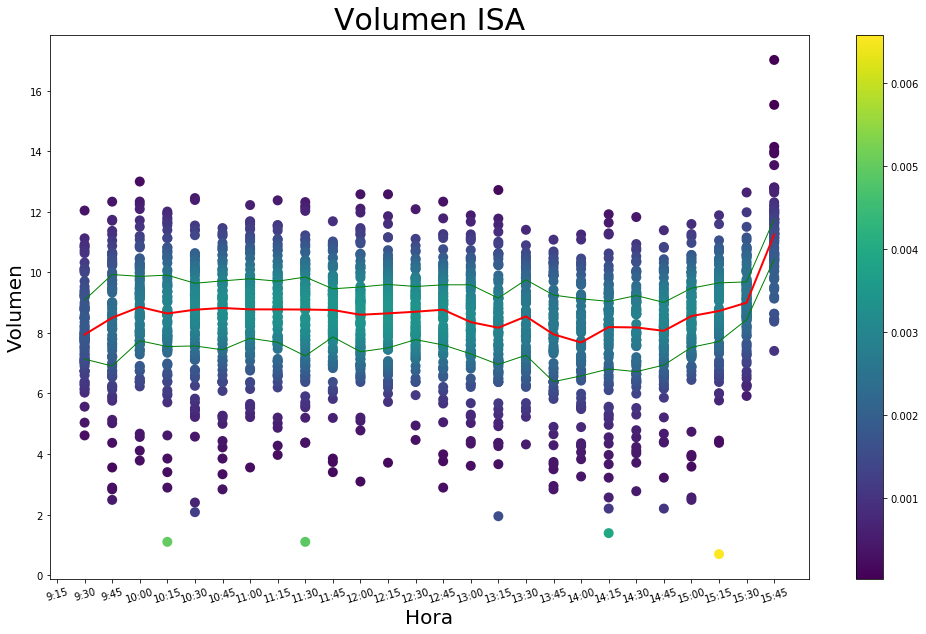

In [25]:
param_list = ["log_depth", "Volatilidad", "Spread", "Volumen"]

for param in param_list:
    for ticker in tickers:
        graph(depth_data, ticker, param)